<font size = 5> Logistic Regression Residual, Leverage and Influence Analysis<font> <br>

*Fit a logistic regression model, visualize plots 4 and 6, then interpret the plots.*

In [1]:
df <- read.csv("loan_dataset.csv")
head(df)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
1,Male,Yes,1,Graduate,No,4583,128,360,1,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,66,360,1,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,120,360,1,Urban,1
4,Male,No,0,Graduate,No,6000,141,360,1,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,267,360,1,Urban,1
6,Male,Yes,0,Not Graduate,No,2333,95,360,1,Urban,1


In [2]:
#Fit logistic regression model
log_model <- glm(formula = Loan_Status ~. ,
                 data = df,
                 family = binomial()
                 )

summary(log_model)


Call:
glm(formula = Loan_Status ~ ., family = binomial(), data = df)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -2.453e+00  9.280e-01  -2.643  0.00821 ** 
GenderMale              2.639e-01  3.264e-01   0.808  0.41884    
MarriedYes              5.753e-01  2.924e-01   1.968  0.04911 *  
Dependents1            -3.533e-01  3.455e-01  -1.023  0.30644    
Dependents2             2.752e-01  3.777e-01   0.729  0.46618    
Dependents3+            2.100e-01  4.841e-01   0.434  0.66444    
EducationNot Graduate  -3.914e-01  3.018e-01  -1.297  0.19472    
Self_EmployedYes       -1.576e-01  3.515e-01  -0.448  0.65394    
ApplicantIncome         1.485e-05  2.674e-05   0.555  0.57861    
LoanAmount             -3.233e-03  1.710e-03  -1.890  0.05871 .  
Loan_Amount_Term       -8.775e-04  2.024e-03  -0.434  0.66457    
Credit_History          3.648e+00  4.331e-01   8.424  < 2e-16 ***
Property_AreaSemiurban  9.802e-01  3.032e-01   3.233  0.0

In [3]:
df[143,]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
143,Male,Yes,1,Graduate,No,33846,260,360,1,Semiurban,0


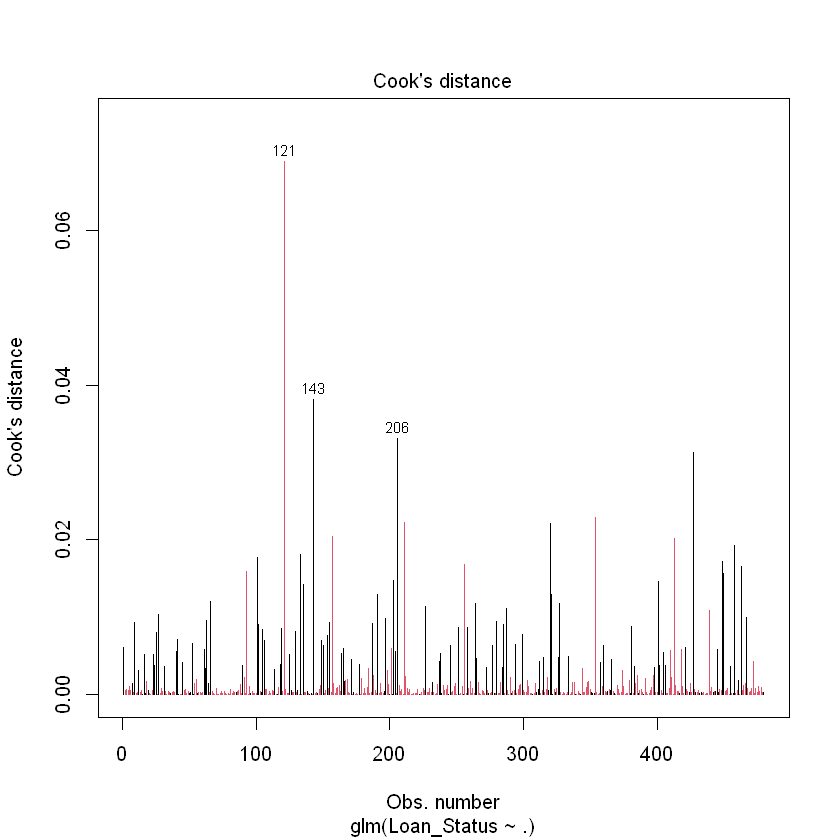

In [4]:
# red: stroke = 1
# black: stroke = 0

plot(x = log_model,
     which = 4,
     col = df$Loan_Status + 1,
     pch = df$Loan_Status + 1)

The plot shows 3 most extreme influential observations. Number 121 (stroke = 1), 143 and 206 (stroke = 0).

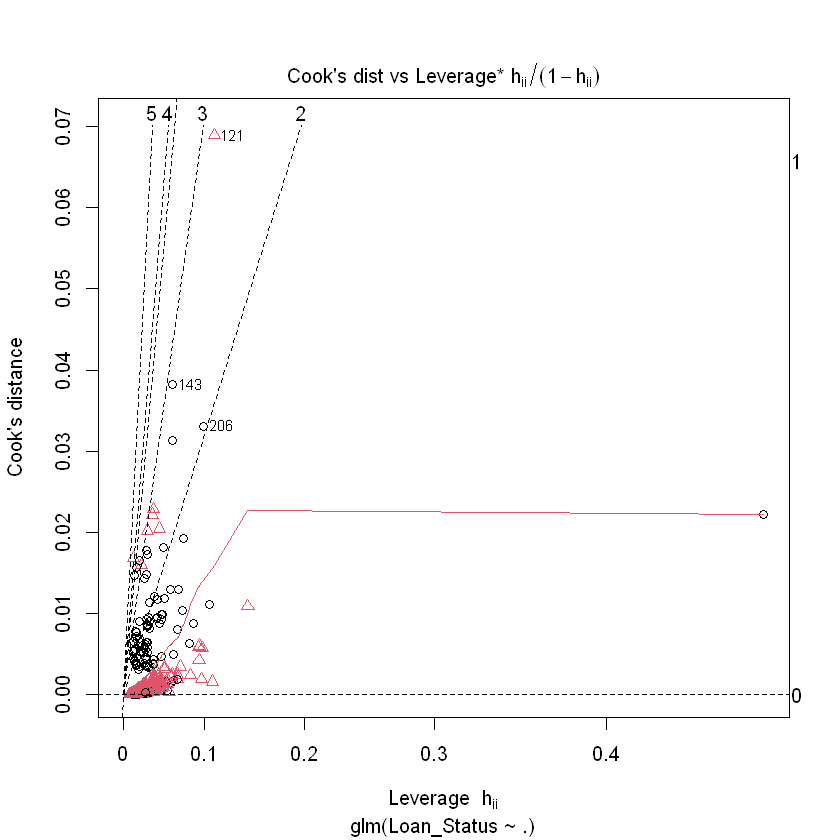

In [5]:
plot(x = log_model,
     which = 6,
     col = df$Loan_Status + 1,
     pch = df$Loan_Status + 1)

Looking at the plot above, there is no point in the top right corner to concern us. 
The extreme values of the Cook's distance (121, 143 and 206) do not have large leverage so they are not that influential.
Althouhg there is one observation on the right far from the rest of the cluster, which does not have a high Cook's distance but has a large leverage.
Let's look at other plots to investigate more.

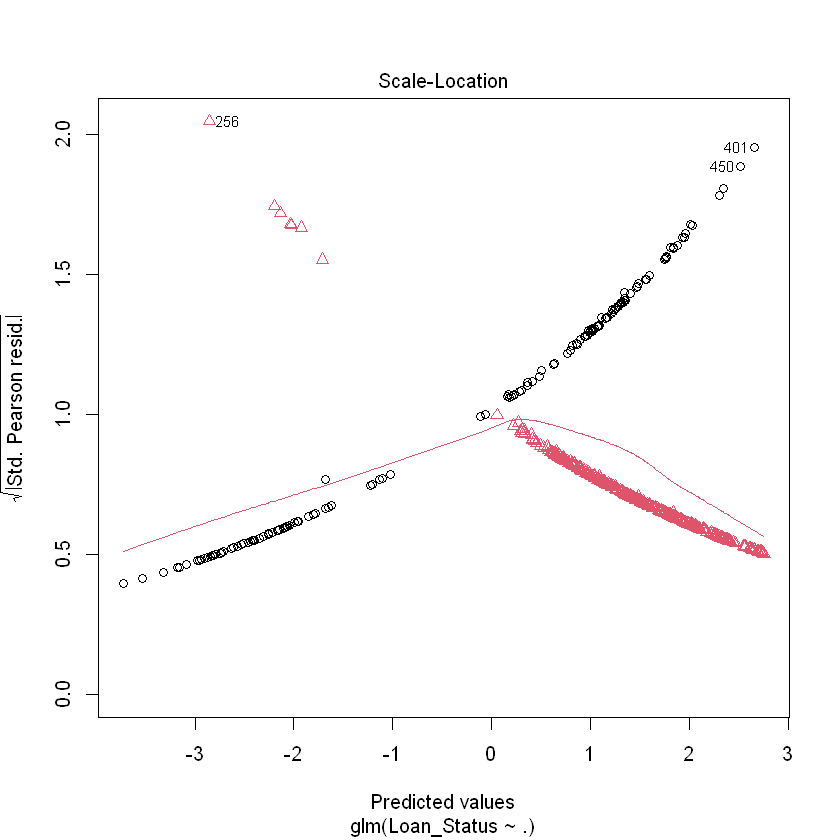

In [6]:
plot(x = log_model,
     which = 3,
     col = df$Loan_Status + 1,
     pch = df$Loan_Status + 1)     

Point 256 stands out in the Scale-Location plot. It is stroke = 1, so it could be the suspicious point in the Cook's-Leverage plot.
Also points 401 and 450 are worth to investigate more.

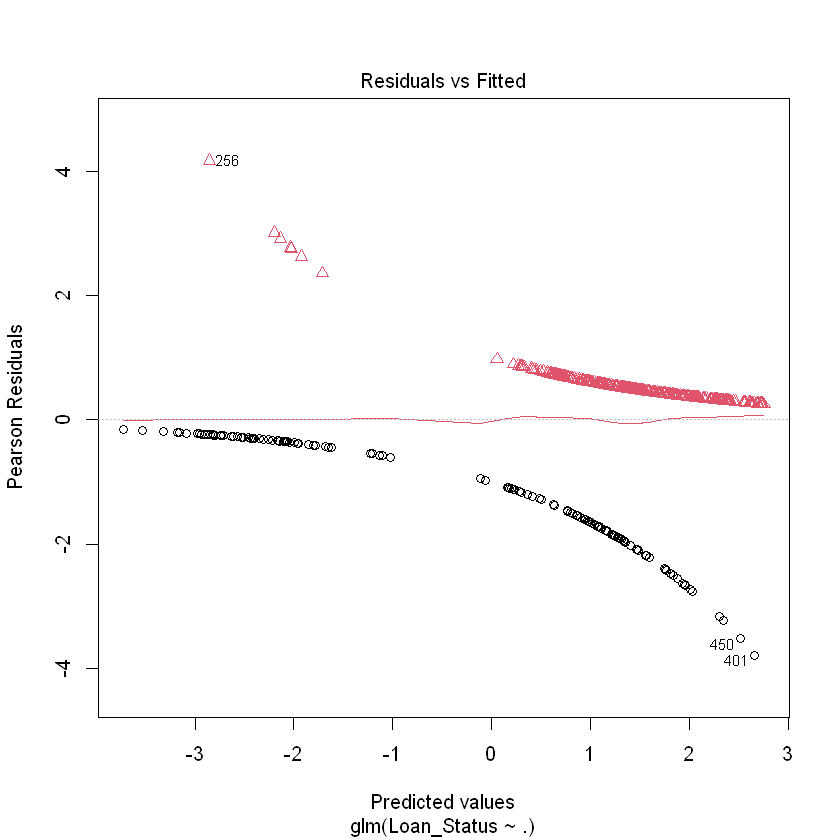

In [7]:
plot(x = log_model,
     which = 1,
     col = df$Loan_Status + 1,
     pch = df$Loan_Status + 1)  

Point 256 has extreme residual in this plot too. Same for points 450 and 401.

In [8]:
df[c(256, 450, 401),]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
256,Male,No,0,Graduate,No,4917,130,360,0,Rural,1
450,Male,Yes,3+,Graduate,No,6406,150,360,1,Semiurban,0
401,Male,Yes,0,Graduate,No,2130,70,180,1,Semiurban,0


It is interesting that the 3 most extreme points in the Cook's distance plot are not the ones that have extreme residuals in the other plots. Which explains why we need to check those points in multiple plots before concluding anything.